# Key takeaways
It is from https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html#sphx-glr-auto-examples-applications-plot-digits-denoising-py
    
1. `sklearn.preprocessing.MinMaxScaler`, 见本文[MinMaxScaler](/notebooks/MNIST/PCA.ipynb#MinMaxScaler)
1. RBF, Radius Basis Function
1. PCA能去噪音。 pca.inverse_transform(pca.transform(X_test_noisy))
    1. https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)

/Users/andrewy/anaconda3/envs/little_ai_zoo/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The idea will be to learn a PCA basis (with and without a kernel) on noisy images and then use these models to reconstruct and denoise these images.

Thus, we split our dataset into a training and testing set composed of 1,000 samples for the training and 100 samples for testing. These images are noise-free and we will use them to evaluate the efficiency of the denoising approaches. In addition, we create a copy of the original dataset and add a Gaussian noise.

The idea of this application, is to show that we can denoise corrupted images by learning a PCA basis on some uncorrupted images. We will use both a PCA and a kernel-based PCA to solve this problem.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1000, test_size=100
)

rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

In [4]:
import matplotlib.pyplot as plt


def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

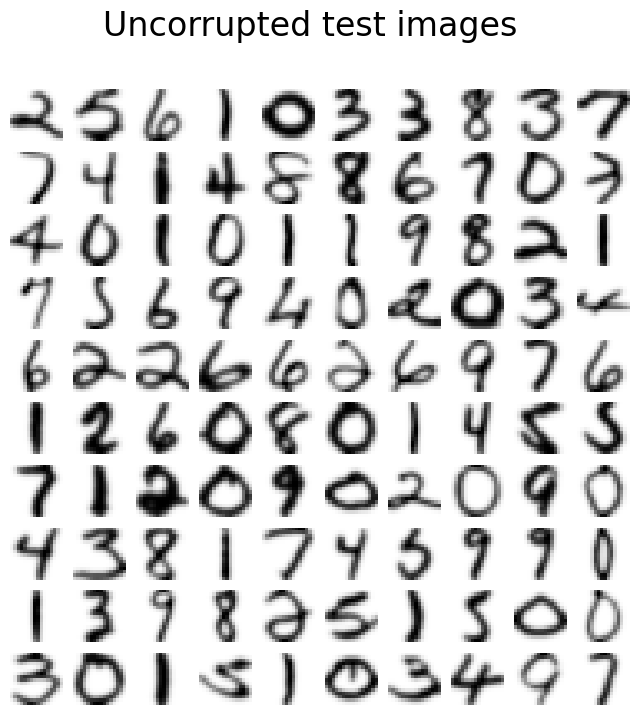

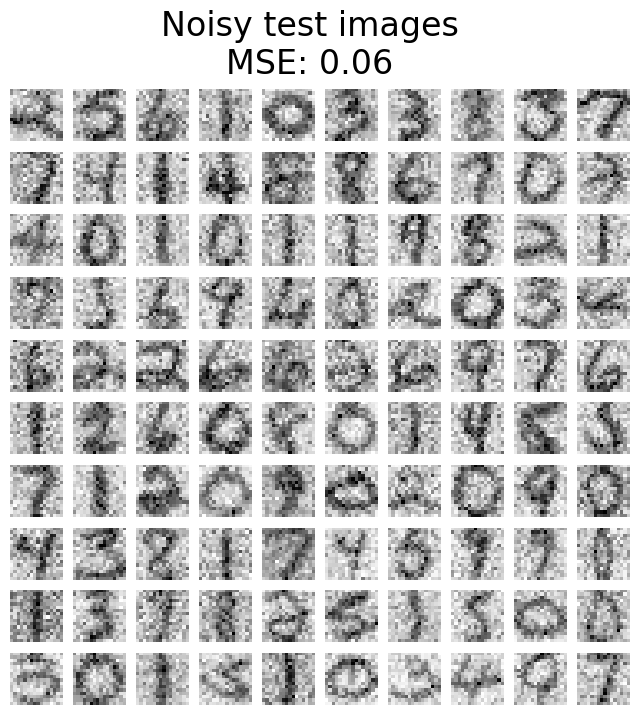

In [5]:
plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_test_noisy, f"Noisy test images\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)

# Learn the PCA basis
We can now learn our PCA basis using both a linear PCA and a kernel PCA that uses a radial basis function (RBF) kernel.

In [6]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=32, random_state=42)
kernel_pca = KernelPCA(
    n_components=400,
    kernel="rbf",
    gamma=1e-3,
    fit_inverse_transform=True,
    alpha=5e-3,
    random_state=42,
)

pca.fit(X_train_noisy)
_ = kernel_pca.fit(X_train_noisy)

In [7]:
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(X_test_noisy)
)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))

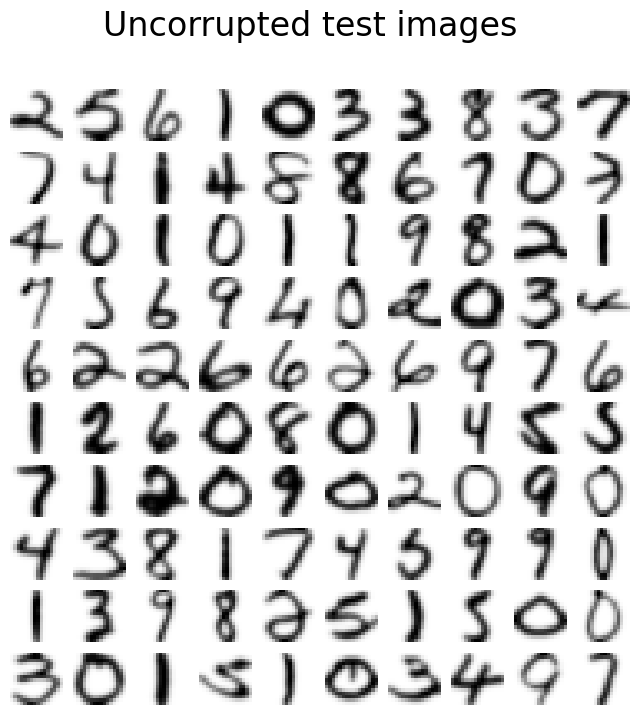

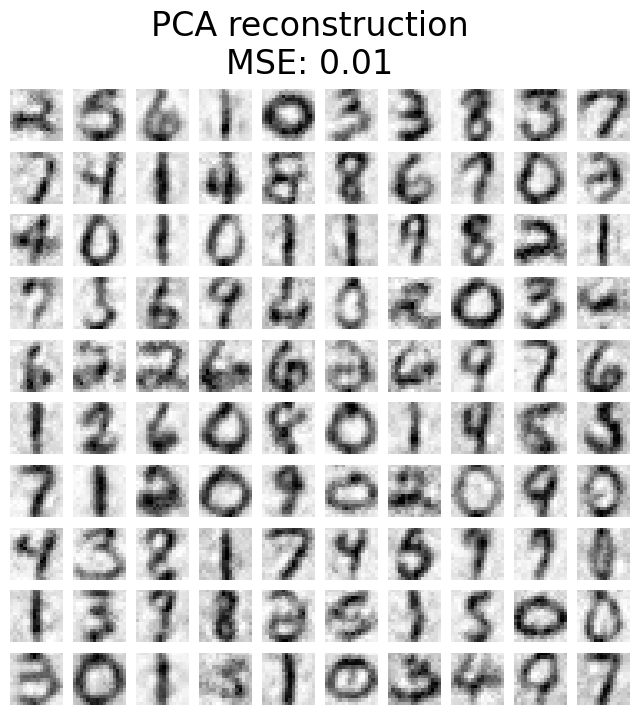

In [10]:
plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)

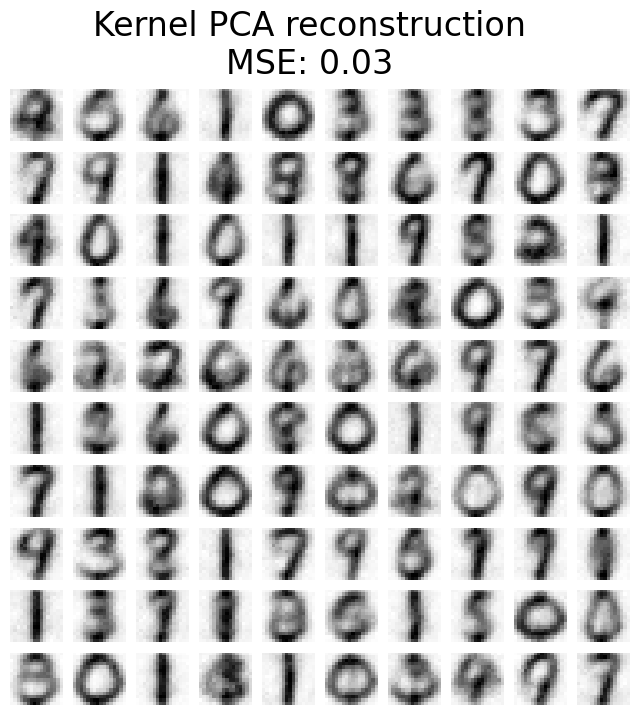

In [9]:

plot_digits(
    X_reconstructed_kernel_pca,
    (
        "Kernel PCA reconstruction\n"
        f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}"
    ),
)

# MinMaxScaler
归一化(MinMaxScaler)和标准化(StandardScaler)

归一化 (Normalization)：
属性缩放到一个指定的最大和最小值（通常是1-0）之间，这可以通过preprocessing.MinMaxScaler类实现。
常用的最小最大规范化方法(x-min(x))/(max(x)-min(x))


标准化(Standardization)：
将数据按比例缩放，使之落入一个小的特定区间内，标准化后的数据可正可负，一般绝对值不会太大。
计算时对每个属性/每列分别进行
将数据按期属性（按列进行）减去其均值，并处以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。
使用z-score方法规范化(x-mean(x))/std(x)
这个在matlab中有特定的方程

1. 使用sklearn.preprocessing.scale()函数，可以直接将给定数据进行标准化
1. 使用sklearn.preprocessing.StandardScaler类，使用该类的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据：


# Refs
1. https://www.cnblogs.com/lvdongjie/p/11349701.html

In [11]:
5e-3

0.005